In [1]:
import logging
import numpy as np
import cv2
import matplotlib.pyplot as plt

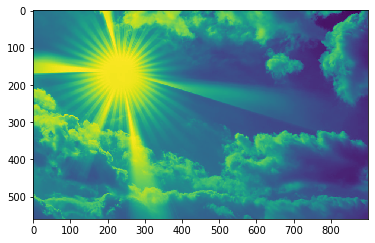

In [19]:
I = cv2.imread('sunlight.jpg',0)
plt.imshow(I)

In [20]:
I_log = np.log1p(np.array(I, dtype="float"))
I_fft = np.fft.fft2(I_log)

I_shape = I_fft.shape
filter_params=[30,2]

a = 0.75
b = 1.25


In [21]:
# butter
P = I_shape[0]/2
Q = I_shape[1]/2
U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
Duv = (((U-P)**2+(V-Q)**2)).astype(float)
H = 1 -  1/(1+(Duv/filter_params[0]**2)**filter_params[1])

In [5]:
#gaussian
P = I_shape[0]/2
Q = I_shape[1]/2
H = np.zeros(I_shape)
U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
Duv = (((U-P)**2+(V-Q)**2)).astype(float)
H = 1 - np.exp((-Duv/(2*(filter_params[0])**2)))

In [22]:
H = np.fft.fftshift(H)
I_fft_filt =(a + b*H)*I_fft

In [23]:
I_filt = np.fft.ifft2(I_fft_filt)

In [24]:
I = np.exp(np.real(I_filt))-1

In [25]:
Img_Filtered = np.uint8(I)

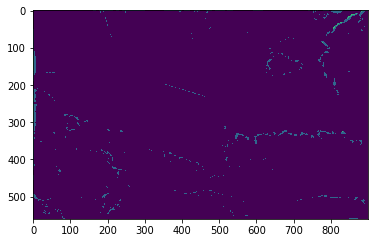

In [26]:
plt.imshow(Img_Filtered)